In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

In [2]:
housing_train_path = 'data/train.csv'
housing_test_path = 'data/test.csv'

In [3]:
housing_full = pd.read_csv(housing_train_path, index_col='index')
housing_test_full = pd.read_csv(housing_test_path, index_col='index')


In [4]:
len(housing_full.index)

1200

In [5]:
housing_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 0 to 1998
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Order            1200 non-null   int64 
 1   PID              1200 non-null   int64 
 2   MS SubClass      1200 non-null   int64 
 3   MS Zoning        1200 non-null   object
 4   Lot Frontage     1200 non-null   int64 
 5   Lot Area         1200 non-null   int64 
 6   Street           1200 non-null   object
 7   Alley            1200 non-null   object
 8   Lot Shape        1200 non-null   object
 9   Land Contour     1200 non-null   object
 10  Utilities        1200 non-null   object
 11  Lot Config       1200 non-null   object
 12  Land Slope       1200 non-null   object
 13  Neighborhood     1200 non-null   object
 14  Condition 1      1200 non-null   object
 15  Condition 2      1200 non-null   object
 16  Bldg Type        1200 non-null   object
 17  House Style      1200 non-null   

array([[<AxesSubplot:title={'center':'Order'}>,
        <AxesSubplot:title={'center':'PID'}>,
        <AxesSubplot:title={'center':'MS SubClass'}>,
        <AxesSubplot:title={'center':'Lot Frontage'}>,
        <AxesSubplot:title={'center':'Lot Area'}>,
        <AxesSubplot:title={'center':'Overall Qual'}>],
       [<AxesSubplot:title={'center':'Overall Cond'}>,
        <AxesSubplot:title={'center':'Year Built'}>,
        <AxesSubplot:title={'center':'Year Remod/Add'}>,
        <AxesSubplot:title={'center':'Mas Vnr Area'}>,
        <AxesSubplot:title={'center':'BsmtFin SF 1'}>,
        <AxesSubplot:title={'center':'Bsmt Unf SF'}>],
       [<AxesSubplot:title={'center':'Total Bsmt SF'}>,
        <AxesSubplot:title={'center':'1st Flr SF'}>,
        <AxesSubplot:title={'center':'2nd Flr SF'}>,
        <AxesSubplot:title={'center':'Low Qual Fin SF'}>,
        <AxesSubplot:title={'center':'Gr Liv Area'}>,
        <AxesSubplot:title={'center':'Bsmt Full Bath'}>],
       [<AxesSubplot:title={

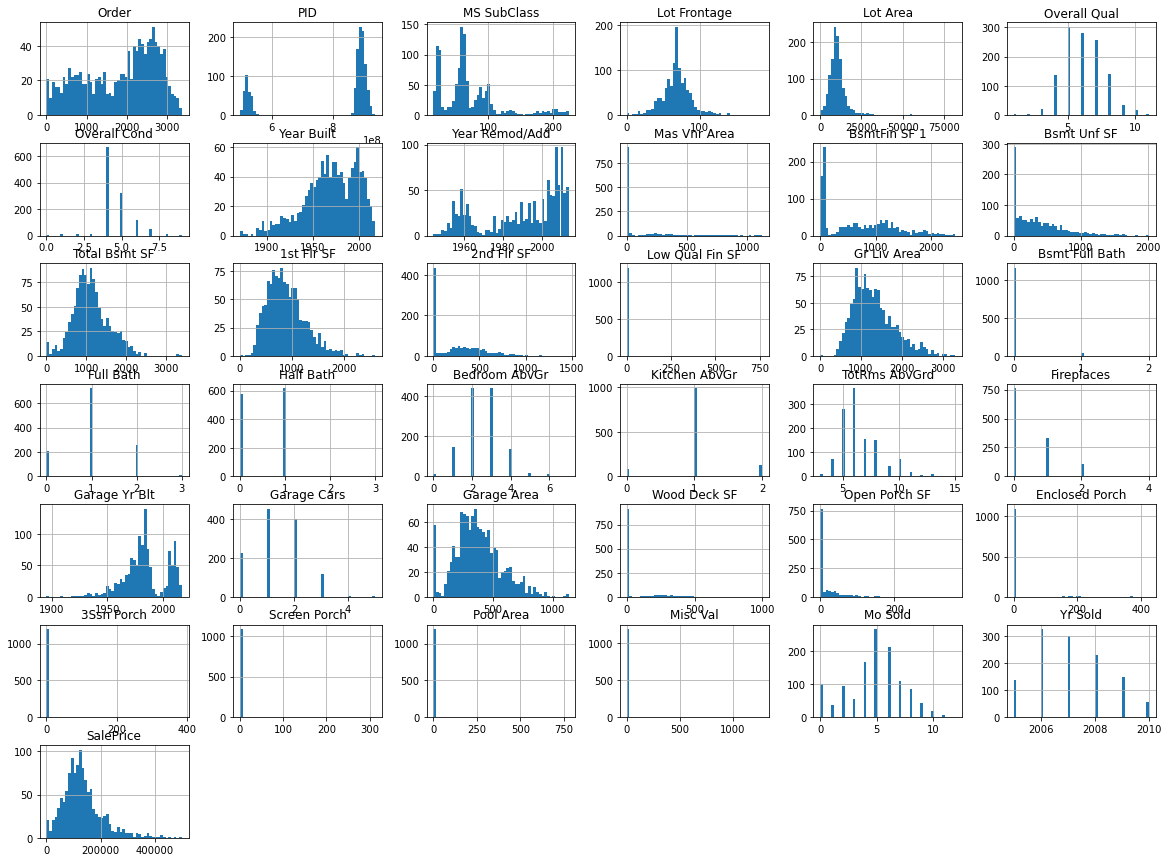

In [6]:
import matplotlib.pyplot as plt

%matplotlib inline
housing_full.hist(bins=50, figsize=(20, 15))

In [7]:
corr_matrix = housing_full.corr()

corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice          1.000000
Full Bath          0.097644
Yr Sold            0.069227
Year Remod/Add     0.060624
3Ssn Porch         0.054362
Open Porch SF      0.041154
Bedroom AbvGr      0.038674
Garage Yr Blt      0.037224
Mo Sold            0.034638
Year Built         0.027718
Misc Val           0.022716
Garage Area        0.020730
2nd Flr SF         0.020685
Screen Porch       0.020335
Lot Frontage       0.019311
TotRms AbvGrd      0.016802
Fireplaces         0.014025
BsmtFin SF 1       0.013840
Bsmt Unf SF        0.000948
MS SubClass        0.000303
Low Qual Fin SF   -0.000273
Half Bath         -0.000654
Pool Area         -0.007196
Order             -0.008462
Overall Cond      -0.011049
Lot Area          -0.012406
Mas Vnr Area      -0.018110
Wood Deck SF      -0.020794
Garage Cars       -0.021998
Overall Qual      -0.024678
PID               -0.029417
Enclosed Porch    -0.039519
1st Flr SF        -0.059102
Bsmt Full Bath    -0.068896
Total Bsmt SF     -0.090773
Kitchen AbvGr     -0

In [8]:
X = housing_full.drop('SalePrice', axis=1)
y = housing_full['SalePrice']

In [9]:
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y,
                                                    train_size=0.8 ,test_size=0.2,
                                                    random_state=0)

In [10]:
categorical_cols = [cname for cname in X_train_full.columns if
                    X_train_full[cname].nunique() < 10 and
                    X_train_full[cname].dtype == 'object']

categorical_cols_much_unique = [cname for cname in X_train_full.columns if
                    X_train_full[cname].nunique() >= 10 and
                    X_train_full[cname].dtype == 'object']

print("less than 10: ", len(categorical_cols),
      "\nmore than 10: ", len(categorical_cols_much_unique))

less than 10:  39 
more than 10:  4


In [11]:
numerical_cols = [cname for cname in X_train_full.columns if
                   X_train_full[cname].dtype == 'int64']

len(numerical_cols)

36

In [12]:
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = housing_test_full[my_cols].copy()

In [13]:
X_train.head()

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Condition 2,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
index,,,,,,,,,,,,,,,,,,,,,
1466,RL,Pave,Grvl,Reg,HLS,AllPub,Corner,Gtl,Feedr,Norm,...,398,224,97,374,0,0,0,0,6,2006
1250,RL,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,Norm,Norm,...,266,11,66,3,1,0,1,0,5,2005
802,RL,Pave,Grvl,Reg,HLS,AllPub,Inside,Gtl,Norm,Norm,...,821,210,0,2,0,0,0,0,8,2007
761,RL,Pave,Grvl,Reg,Low,AllPub,Inside,Gtl,Norm,Norm,...,446,10,0,1,0,0,1,0,6,2007
1033,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,...,389,16,0,5,0,87,0,0,4,2008


index
1466    379913
1250     52676
802      72232
761      97082
1033     98868
Name: SalePrice, dtype: int64

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


numerical_transformer = SimpleImputer(strategy="median")

categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

model = RandomForestRegressor(n_estimators=100, random_state=0)

final_model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                     ])

final_model.fit(X_train, y_train)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

numerical_transformer = SimpleImputer(strategy="median")

categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

housing_prepared = preprocessor.fit_transform(X_train)


param_grid = [
    {'n_estimators': [10 ,50, 100, 200], 'max_features': [4, 6, 8, 10]},
    {'bootstrap': [False], 'n_estimators': [50, 100], 'max_features': [4, 6, 8]}
]



forest_reg = RandomForestRegressor()

grib_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)


grib_search.fit(housing_prepared, y_train)

grib_search.best_params_

{'max_features': 6, 'n_estimators': 200}

In [15]:
cvres = grib_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

76869.64271844433 {'max_features': 4, 'n_estimators': 10}
74104.46648362372 {'max_features': 4, 'n_estimators': 50}
73592.26232599576 {'max_features': 4, 'n_estimators': 100}
73559.48907191912 {'max_features': 4, 'n_estimators': 200}
76757.42779362593 {'max_features': 6, 'n_estimators': 10}
74166.03499623573 {'max_features': 6, 'n_estimators': 50}
73357.52507876366 {'max_features': 6, 'n_estimators': 100}
73225.11473100465 {'max_features': 6, 'n_estimators': 200}
77113.44764118682 {'max_features': 8, 'n_estimators': 10}
73282.005457104 {'max_features': 8, 'n_estimators': 50}
73538.93322037329 {'max_features': 8, 'n_estimators': 100}
73459.8533434214 {'max_features': 8, 'n_estimators': 200}
76965.72862895584 {'max_features': 10, 'n_estimators': 10}
73876.94439726512 {'max_features': 10, 'n_estimators': 50}
73719.73605846064 {'max_features': 10, 'n_estimators': 100}
73409.27430700582 {'max_features': 10, 'n_estimators': 200}
74590.9902080874 {'bootstrap': False, 'max_features': 4, 'n_est

In [16]:
model = grib_search.best_estimator_

In [17]:
final_model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                     ])

preds = final_model.predict(X_valid)

print('MAE:', mean_absolute_error(y_valid, preds))

MAE: 54215.9883125


In [18]:
preds_test = final_model.predict(X_test)

In [19]:
output = pd.DataFrame({'1': X_test.index,
                       '0': preds_test})



output.drop([0]).to_csv('submission.csv', index=False)

In [20]:
sub = pd.read_csv('submission.csv')
test_sub = pd.read_csv('data/sample_submit.csv')

In [21]:
sub

,1,0
0,2,140728.535
1,4,115458.685
2,5,134865.735
3,6,146750.220
4,8,120273.105
...,...,...
794,1991,155704.040
795,1992,116984.080
796,1993,128406.705
797,1995,124883.960


In [22]:
test_sub

,1,0
0,2,0
1,4,0
2,5,0
3,6,0
4,8,0
...,...,...
794,1991,0
795,1992,0
796,1993,0
797,1995,0
